In [113]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<span style="color:green; font-weight:bold; font-size:24px">1. Loading and Preprocessing</span>

In [117]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [119]:
df.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


 <span style="color:Orange; font-weight:bold; font-size:20px">Extract brand from CarName</span> 

In [121]:
df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0].lower())

In [123]:
df.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0,volvo
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0,volvo
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0,volvo
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0,volvo
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0,volvo
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0,volvo


In [125]:
# Fix misspellings
df['CarBrand'] = df['CarBrand'].replace({'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota'})

In [127]:
# Drop unnecessary columns
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

 <span style="color:blue; font-weight:bold; font-size:16px">To convert categorical columns into a format that can be used in machine learning models, which require numeric input.</span>

  <span style="color:orange; font-weight:bold; font-size:20px"> one-hot encoding on all categorical variables in the DataFrame.</span> 

In [129]:
# Convert categorical to dummies
df = pd.get_dummies(df, drop_first=True)

 <span style="color:orange; font-weight:bold; font-size:20px">Separate features and target .</span>

In [131]:

X = df.drop('price', axis=1)
y = df['price']

 <span style="color:orange; font-weight:bold; font-size:20px">Scaling features</span>

In [134]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 <span style="color:orange; font-weight:bold; font-size:20px">Test_Train_Split</span>

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<span style="color:green; font-weight:bold; font-size:24px">2. Model Implementation </span>

In [139]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results = {}
predictions = {}

<span style="color:green; font-weight:bold; font-size:24px">3. Model Evaluation</span>

In [141]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    results[name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

In [143]:
results_df = pd.DataFrame(results).T

<span style="color:orange; font-weight:bold; font-size:20px">Model Evaluation Metrics:</span>

In [146]:
print(results_df)

                       R2 Score           MSE           MAE
Linear Regression -7.171219e+23  5.661249e+31  1.175071e+15
Decision Tree      9.069070e-01  7.349134e+06  1.782589e+03
Random Forest      9.582669e-01  3.294575e+06  1.293234e+03
Gradient Boosting  9.241813e-01  5.985429e+06  1.710336e+03
SVR               -1.006148e-01  8.688696e+07  5.701536e+03


<span style="color:orange; font-weight:bold; font-size:20px">Plotting Predictions vs Actual price </span>

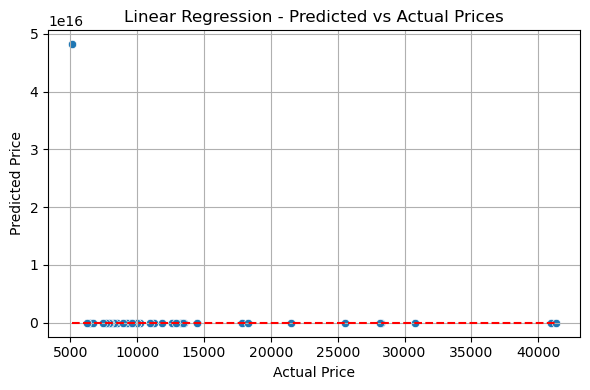

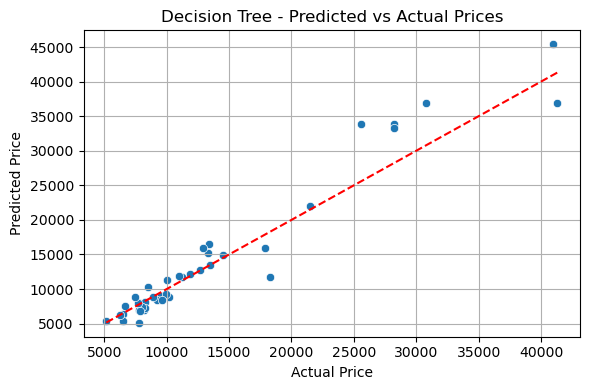

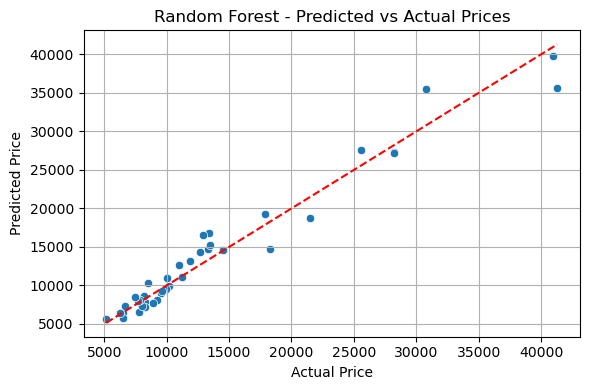

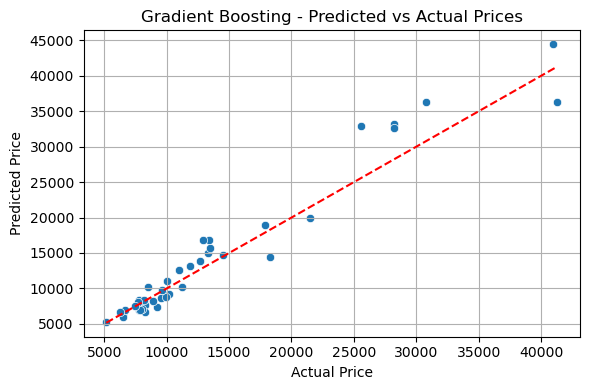

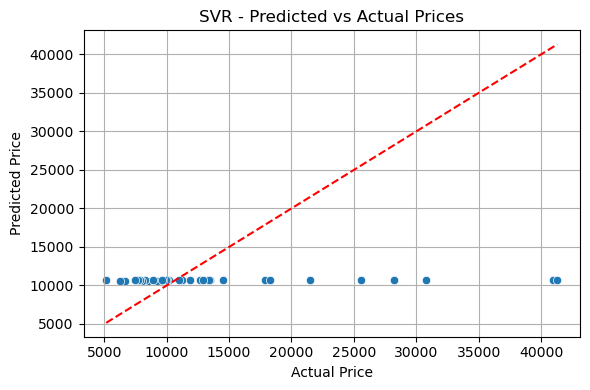

In [149]:
# Plot Predictions vs Actuals
for name in predictions:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=predictions[name])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.title(f'{name} - Predicted vs Actual Prices')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<span style="color:green; font-weight:bold; font-size:24px">4. Feature Importance (for tree-based models)</span> 

In [152]:
rf_model = models["Random Forest"]
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

<span style="color:orange; font-weight:bold; font-size:20px">Top 10 Important Features : </span>

In [154]:
print(importances.head(10))

enginesize      0.544159
curbweight      0.298449
highwaympg      0.044743
horsepower      0.033483
carwidth        0.013090
carlength       0.007767
CarBrand_bmw    0.007114
wheelbase       0.006991
citympg         0.006420
peakrpm         0.006174
dtype: float64


 <span style="color:orange; font-weight:bold; font-size:20px">Plotting feature importances .</span> 

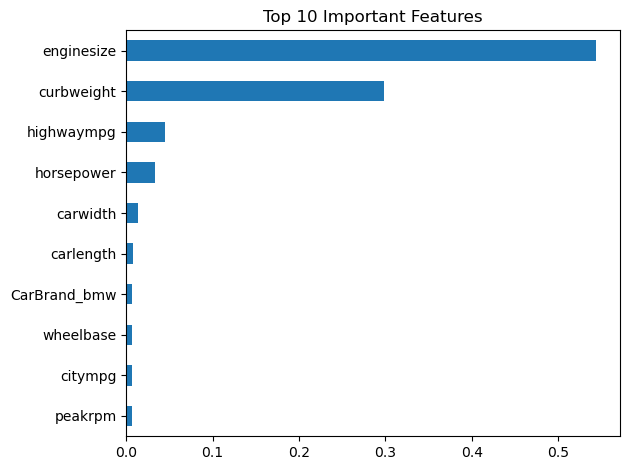

In [156]:
importances.head(10).plot(kind='barh', title='Top 10 Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<span style="color:green; font-weight:bold; font-size:24px"> 5. Hyperparameter Tuning (for best model, say Random Forest)(for tree-based models)</span>

In [158]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
}

In [160]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

 <span style="color:orange; font-weight:bold; font-size:20px"> Tuned Random Forest Performance:.</span>

In [162]:

print("R2 Score:", r2_score(y_test, y_pred_tuned))
print("MSE:", mean_squared_error(y_test, y_pred_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_tuned))

R2 Score: 0.9594890098487735
MSE: 3198100.452354031
MAE: 1251.0218455284553
